In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
joined_df = pd.merge(city_df, ride_df, on = 'city', how='inner')
# Display the data table for preview
joined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#creating variables
urban_df = joined_df.loc[(joined_df['type'] == 'Urban'), :]
suburban_df = joined_df.loc[(joined_df['type'] == 'Suburban'), :]
rural_df = joined_df.loc[(joined_df['type'] == 'Rural'), :]

## Bubble Plot of Ride Sharing Data

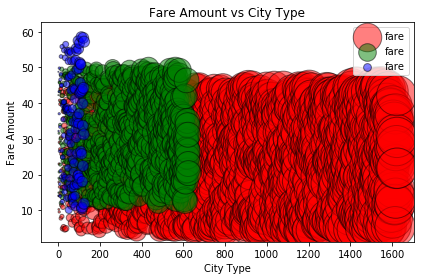

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_x = np.arange(len(urban_df))
urban_y = urban_df['fare']
urban_locations = [value for value in urban_x]

suburban_x = np.arange(len(suburban_df))
suburban_y = suburban_df['fare']
suburban_locations = [value for value in suburban_x]

rural_x = np.arange(len(rural_df))
rural_y = rural_df['fare']
rural_locations = [value for value in rural_x]

# Build the scatter plots for each city types
urbanscatter = plt.scatter(urban_x, urban_y, marker="o", facecolors="red", edgecolors="black",
            s=urban_x, alpha=0.5)

suburbanscatter = plt.scatter(suburban_x, suburban_y, marker="o", facecolors="green", edgecolors="black",
            s=suburban_x, alpha=0.5)

ruralscatter = plt.scatter(rural_x, rural_y, marker="o", facecolors="blue", edgecolors="black",
            s=rural_x, alpha=0.5)

# Incorporate the other graph properties
plt.title("Fare Amount vs City Type")
plt.xlabel("City Type")
plt.ylabel("Fare Amount")

# Create a legend
plt.legend(loc="upper right")

# Incorporate a text label regarding circle size

# Save Figure
plt.tight_layout()
plt.savefig("pyber.png")
plt.show()

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

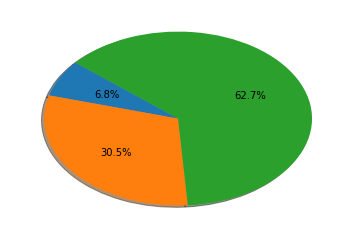

In [5]:
# Calculate Type Percents
grouped_df = joined_df.groupby(['type'])
type_counts = joined_df['type'].value_counts()
fare_sum = grouped_df['fare'].sum()

merged_table = pd.DataFrame({'Number of Fares': type_counts,'Total Fare $': fare_sum})
merged_table.head()
# Build Pie Chart
# fare_sum.plot(kind='pie', subplots=True)
plt.pie(fare_sum, autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("pyber1.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

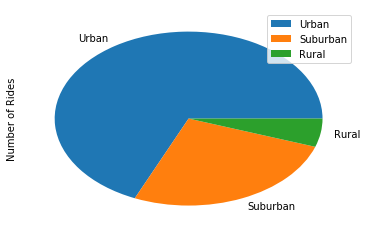

In [7]:
# Calculate Ride Percents
ride_counts = joined_df['ride_id'].count()
ride_table = pd.DataFrame({'Number of Rides': type_counts})
ride_table.head()
# Build Pie Chart
ride_table.plot(kind='pie', subplots=True)
# Save Figure
plt.savefig("pyber2.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

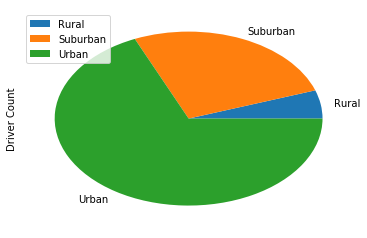

In [9]:
driver_count = grouped_df['driver_count'].count()

driver_table = pd.DataFrame({'Driver Count': driver_count})
driver_table.head()

# Build Pie Chart
driver_table.plot(kind='pie', subplots=True)
# Save Figure
plt.savefig("pyber3.png")

In [10]:
# Show Figure
plt.show()